# WeatherPy
----

### Analysis
1. There is strong coorelation between Latitude and Temperature, southern hamisphere(lower latitudes) have higher        temperature, and Northan hemisphere(higher latitudes) have lower temperature.
2. There is weak coorelation between Latitude and Humidity, however most of the cities lies between 60 to 100%            humidity. 
3. There is very weak coorealtion between Latitude and Cloudiness, however, there is band of cities showing around 0,    80 and 90% cloudiness.
4. There is no strong relationship between Latitude and Wind Speed. However, in southern hemisphere, there is one outlier is showing wind speed around 50 mph, but all other cities lies between 0 to 30 mph.

Note: As this data is randomly generated, results may very every time the running code. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

587


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"
# Imerial units for fahrenheit
units = "imperial"
# Empty lists for latitude, longitude, temperature, humidity, 
# cloudiness, wind speed, country, and date
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through and grab the latitude, longitude, temperature, humidity, 
# cloudiness, wind speed, country, and date using OpenWeatherMapAPI

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        #print("Skipping city")
        lat.append("NAN")
        lng.append("NAN")
        max_temp.append("NAN")
        humidity.append("NAN")
        cloudiness.append("NAN")
        wind_speed.append("NAN")
        country.append("NAN")
        date.append("NAN")

In [4]:
# Adding latitude, longitude, temperature, humidity, 
# cloudiness, wind speed, country and date to dataframe
df = {
    'Cities': cities,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed  
}
cities_df = pd.DataFrame(df)
cities_df.count()

Cities        587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [5]:
# Cleaning dataframe by choosing only row which has country not equal to "NAN"
cleaned_cities_df = cities_df[cities_df.Country != 'NAN']
# Reseting index after cleaning data
cleaned_cities_df.reset_index()
# Row count after cleaning data
cleaned_cities_df.count()

Cities        521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Adding cleaned data to .csv file and displaying dataframe
cleaned_cities_df.to_csv('output_data_file')
cleaned_cities_df

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,0,AU,1546298269,45,-23.58,149.07,84.15,12.01
1,hasaki,20,JP,1546297200,100,35.73,140.83,32,3.36
2,cape town,0,ZA,1546297200,88,-33.93,18.42,66.2,10.29
3,krasnyy yar,88,RU,1546298269,92,50.7,44.73,7.43,7.87
4,ushuaia,75,AR,1546297200,81,-54.81,-68.31,46.4,48.32
5,hermanus,88,ZA,1546298270,95,-34.42,19.24,59.36,2.17
6,punta arenas,75,CL,1546297200,65,-53.16,-70.91,46.4,33.33
7,tiksi,76,RU,1546298270,73,71.64,128.87,-2.97,27.34
8,richards bay,80,ZA,1546298270,96,-28.77,32.06,72.32,6.98
9,souillac,90,FR,1546295400,93,45.6,-0.6,44.6,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

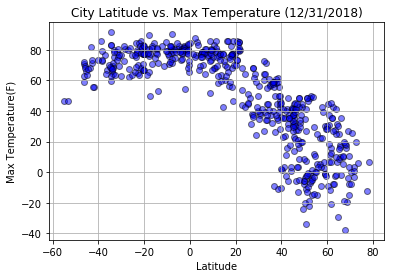

In [7]:
# Build a scatter plot City Latitude vs. Temperature
x1 = cleaned_cities_df['Lat']
y1 = cleaned_cities_df['Max Temp']
plt.scatter(x1, y1, c='blue',alpha=0.5,edgecolor='black')
plt.title("City Latitude vs. Max Temperature (12/31/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)
# Save the figure
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

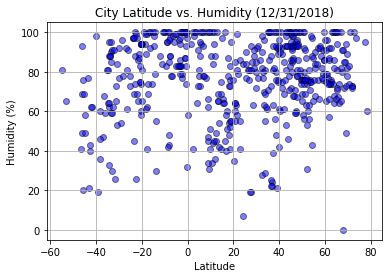

In [8]:
# Build a scatter plot City Latitude vs. Humidity
x1 = cleaned_cities_df['Lat']
y2 = cleaned_cities_df['Humidity']
plt.scatter(x1, y2, c='blue',alpha=0.5,edgecolor='black')
plt.title("City Latitude vs. Humidity (12/31/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

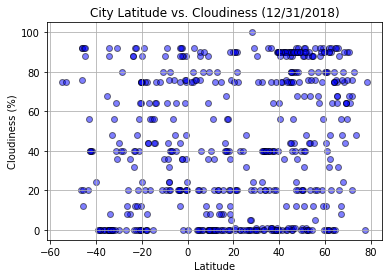

In [9]:
# Build a scatter plot City Latitude vs. Cloudiness
x1 = cleaned_cities_df['Lat']
y3 = cleaned_cities_df['Cloudiness']
plt.scatter(x1, y3, c='blue',alpha=0.5,edgecolor='black')
plt.title("City Latitude vs. Cloudiness (12/31/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

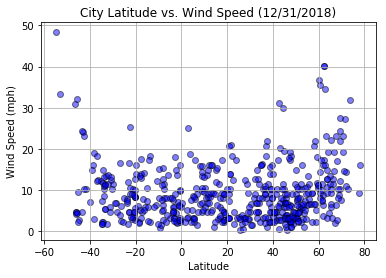

In [10]:
# Build a scatter plot City Latitude vs. Wind Speed
x1 = cleaned_cities_df['Lat']
y4 = cleaned_cities_df['Wind Speed']
plt.scatter(x1, y4, c='blue',alpha=0.5,edgecolor='black')
plt.title("City Latitude vs. Wind Speed (12/31/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
# Save the figure
plt.savefig("Wind_Speed.png")
plt.show()